In [1]:
from keras.layers.core import Activation, Dense, Dropout, SpatialDropout1D
from keras.layers import Embedding,LSTM
from keras.models import Sequential
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split

import collections
import matplotlib.pyplot as plt
import nltk
import numpy as np
import os

In [2]:
ftrain = open('/content/train.txt','r')
maxlen = 0
word_freq = collections.Counter()
num_recs = 0
for line in ftrain:
    label,sentence = line.strip().split('\t')
    words = sentence.split(' ')
    if len(words) > maxlen:
        maxlen = len(words)
    for word in words:
        word_freq[word] += 1
    num_recs +=1
ftrain.close()

In [3]:
print(num_recs)
print(len(word_freq))
print(maxlen)

7086
3374
40


In [4]:
MAX_FEATURES = 2000
MAX_SENTENCE_LENGTH = 40

vocab_size = min(MAX_FEATURES, len(word_freq)) + 2
print(vocab_size)

word2index = {x[0]: i+2 for i, x in enumerate(word_freq.most_common(MAX_FEATURES))}

word2index["PAD"] = 0
word2index["UNK"] = 0

index2word = {v:k for k,v in word2index.items()}

2002


In [5]:
print(index2word)

{2: 'I', 3: 'the', 4: 'Harry', 5: 'and', 6: 'Vinci', 7: 'Da', 8: 'Brokeback', 9: 'is', 10: 'love', 11: 'a', 12: 'Code', 13: 'was', 14: 'Potter', 15: 'The', 16: 'i', 17: 'like', 18: 'Mountain', 19: 'to', 20: 'that', 21: 'it', 22: 'Mission', 23: 'hate', 24: 'because', 25: 'brokeback', 26: 'Impossible', 27: 'mission', 28: 'Potter,', 29: 'much', 30: '"', 31: 'vinci', 32: 'da', 33: 'of', 34: 'impossible', 35: 'as', 36: 'my', 37: 'Potter.', 38: 'really', 39: 'stupid', 40: 'code', 41: 'awesome', 42: 'so', 43: 'you', 44: 'mountain', 45: 'sucked', 46: 'but', 47: 'just', 48: 'sucks', 49: 'movie.', 50: 'Potter..', 51: 'Mountain.', 52: 'movies', 53: '/', 54: 'out', 55: 'or', 56: 'am', 57: 'into', 58: '3', 59: 'for', 60: 'an', 61: 'movie', 62: 'be', 63: 'with', 64: 'are', 65: 'we', 66: 'think', 67: 'LOVE', 68: 'one', 69: 'how', 70: 'know', 71: 'if', 72: 'who', 73: 'sucks.', 74: 'people', 75: 'would', 76: 'his', 77: "it's", 78: 'reading', 79: 'only', 80: 'fucking', 81: 'want', 82: 'why', 83: 'series

In [6]:
print(word2index)

{'I': 2, 'the': 3, 'Harry': 4, 'and': 5, 'Vinci': 6, 'Da': 7, 'Brokeback': 8, 'is': 9, 'love': 10, 'a': 11, 'Code': 12, 'was': 13, 'Potter': 14, 'The': 15, 'i': 16, 'like': 17, 'Mountain': 18, 'to': 19, 'that': 20, 'it': 21, 'Mission': 22, 'hate': 23, 'because': 24, 'brokeback': 25, 'Impossible': 26, 'mission': 27, 'Potter,': 28, 'much': 29, '"': 30, 'vinci': 31, 'da': 32, 'of': 33, 'impossible': 34, 'as': 35, 'my': 36, 'Potter.': 37, 'really': 38, 'stupid': 39, 'code': 40, 'awesome': 41, 'so': 42, 'you': 43, 'mountain': 44, 'sucked': 45, 'but': 46, 'just': 47, 'sucks': 48, 'movie.': 49, 'Potter..': 50, 'Mountain.': 51, 'movies': 52, '/': 53, 'out': 54, 'or': 55, 'am': 56, 'into': 57, '3': 58, 'for': 59, 'an': 60, 'movie': 61, 'be': 62, 'with': 63, 'are': 64, 'we': 65, 'think': 66, 'LOVE': 67, 'one': 68, 'how': 69, 'know': 70, 'if': 71, 'who': 72, 'sucks.': 73, 'people': 74, 'would': 75, 'his': 76, "it's": 77, 'reading': 78, 'only': 79, 'fucking': 80, 'want': 81, 'why': 82, 'series': 8

In [8]:
X = np.empty( (num_recs, ) , dtype = list)
y = np.zeros( (num_recs, ) )
i = 0

ftrain = open('/content/train.txt','r')
for line in ftrain:
    label,sentence = line.strip().split('\t')
    words = sentence.split(' ')
    seqs = []
    for word in words:
        if word in word2index:
            seqs.append(word2index[word])
        else:
            seqs.append(word2index["UNK"])
    X[i] = seqs
    y[i] = int(label)
    i +=1
ftrain.close()
X = sequence.pad_sequences(X,maxlen = MAX_SENTENCE_LENGTH)
print(seqs)

[92, 5, 8, 18, 13, 11, 162, 49]


In [9]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.2 , random_state=45)

In [10]:
EMBEDDING_SIZE = 128
HIDDEN_LAYER_SIZE = 64
BATCH_SIZE = 32
NUM_EPOCHS = 10

# Create model
model = Sequential()
model.add(Embedding(vocab_size, EMBEDDING_SIZE, input_length=MAX_SENTENCE_LENGTH))
model.add(LSTM(HIDDEN_LAYER_SIZE,dropout = 0.2, recurrent_dropout= 0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

RNN = model.fit(X_train,y_train,batch_size = BATCH_SIZE,epochs = NUM_EPOCHS,validation_data = (X_test,y_test))

Epoch 1/10
178/178 [==============================] - 44s 214ms/step - loss: 0.2379 - accuracy: 0.8924 - val_loss: 0.0714 - val_accuracy: 0.9711
Epoch 2/10
178/178 [==============================] - 60s 334ms/step - loss: 0.0399 - accuracy: 0.9859 - val_loss: 0.0358 - val_accuracy: 0.9873
Epoch 3/10
178/178 [==============================] - 45s 252ms/step - loss: 0.0132 - accuracy: 0.9965 - val_loss: 0.0364 - val_accuracy: 0.9859
Epoch 4/10
178/178 [==============================] - 41s 228ms/step - loss: 0.0093 - accuracy: 0.9979 - val_loss: 0.0334 - val_accuracy: 0.9894
Epoch 5/10
178/178 [==============================] - 43s 243ms/step - loss: 0.0063 - accuracy: 0.9982 - val_loss: 0.0618 - val_accuracy: 0.9852
Epoch 6/10
178/178 [==============================] - 35s 197ms/step - loss: 0.0067 - accuracy: 0.9982 - val_loss: 0.0356 - val_accuracy: 0.9887
Epoch 7/10
178/178 [==============================] - 33s 183ms/step - loss: 0.0028 - accuracy: 0.9993 - val_loss: 0.0499 - val_ac

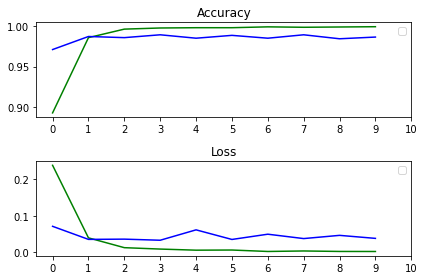

In [15]:
import numpy as np

# Accuracy
plt.subplot(211)
plt.title('Accuracy')
plt.plot(RNN.history['accuracy'],color = 'g')
plt.plot(RNN.history['val_accuracy'],color = 'b')
plt.legend(loc = 'best')
plt.xticks(np.arange(0,11,1))

# Loss
plt.subplot(212)
plt.title('Loss')
plt.plot(RNN.history['loss'],color = 'g')
plt.plot(RNN.history['val_loss'],color = 'b')
plt.legend(loc = 'best')
plt.xticks(np.arange(0,11,1))

plt.tight_layout()
plt.show()

In [18]:
score, acc =  model.evaluate(X_test,y_test,batch_size = BATCH_SIZE)
print('Test score: %.3f , accuracy: %.3f' %(score,acc))
print("Predict Label Sentence")
for i in range(10):
    idx = np.random.randint(len(X_test))
    xtest = X_test[idx].reshape(1,40)
    y_label = y_test[idx]
    y_pred = model.predict(xtest)[0][0]
    sent = " ".join([index2word[x] for x in xtest[0].tolist() if x != 0])
    print("%.0f         %d          %s" %(y_pred,y_label,sent))

45/45 [==============================] - 1s 21ms/step - loss: 0.0385 - accuracy: 0.9866
Test score: 0.039 , accuracy: 0.987
Predict Label Sentence
1         1          I wanted desperately to love'The Da Vinci Code as a film.
1         1          i love mission impossible!!!!!!!!!!!..
1         1          I like Mission Impossible movies because you never know who's on the right side.
0         0          Oh, and Brokeback Mountain was a terrible movie.
1         1          Brokeback Mountain was so awesome.
1         1          the story of Harry Potter is a deep and profound one, and I love Harry Potter.
0         0          Da Vinci Code = Up, Up, Down, Down, Left, Right, Left, Right, B, A, SUCK!
0         0          I hate Harry Potter.
0         0          I hate Harry Potter.
1         1          i love being a sentry for mission impossible and a station for bonkers.
